In [1]:
# import libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
sns.set(style="darkgrid")

# stats
from scipy import stats
from sklearn import linear_model

In [2]:
# read data
df1 = pd.read_csv('Craigslist.csv')

In [3]:
df1.head(10)

,Title,Price,Bedrooms,Bathrooms,Square_feet,Dog,Cat,Parking,Smoking,Time_posted,Longitude,Latitude,Area
0,$7500 / 4br - 2200ft2 - Prime Location Near Do...,7500.0,4.0,2.0,2200.0,No,No,NaN,no smoking,2020-03-02 18:03:00,-122.188886,37.451399,pen
1,$2195 / 1br - 950ft2 - YOUR DREAM HOME IS ABOU...,2195.0,1.0,1.0,950.0,No,Yes,NaN,no smoking,2020-03-02 18:03:00,-122.139221,37.686232,eby
2,$5375 / 3br - 1286ft2 - Stunning Views of the ...,5375.0,3.0,2.0,1286.0,Yes,Yes,NaN,smoking ok,2020-02-20 18:13:00,-122.274055,37.795558,eby
3,$3864 / 2br - 1149ft2 - Enjoy 2 Weeks FREE- Le...,3864.0,2.0,2.0,1149.0,Yes,Yes,NaN,no smoking,2020-03-02 17:27:00,-121.984400,37.348300,sby
4,$2400 / 1br - 550ft2 - Cozy 1 bed/1 bath in Co...,2400.0,1.0,1.0,550.0,No,No,NaN,no smoking,2020-03-02 18:02:00,-122.152399,37.460140,pen
5,$2800 / 2br - 1061ft2 - Courtyard Top Floor Tw...,2800.0,2.0,2.0,1061.0,Yes,Yes,NaN,no smoking,2020-03-02 18:02:00,-122.057397,37.901322,eby
6,"$4000 / 3br - 800ft2 - 3BR, 2BA: Spacious, Urb...",4000.0,3.0,2.0,800.0,No,No,street parking,no smoking,2020-03-02 17:54:00,-122.407001,37.795077,sfc
7,$6850 / 2br - 1300ft2 - Remodeled Home on Larg...,6850.0,2.0,2.5,1300.0,No,No,street parking,no smoking,2020-03-02 18:02:00,-122.145085,37.434029,pen
8,$2450 / 2br - 1000ft2 - ENJOY THE LUXURY OF TH...,2450.0,2.0,1.0,1000.0,No,Yes,NaN,no smoking,2020-03-02 18:02:00,-122.139221,37.686232,eby
9,$2705 / 1br - 770ft2 - 1-Bedroom with 2 Closet...,2705.0,1.0,1.0,770.0,Yes,Yes,NaN,no smoking,2020-03-02 18:02:00,-122.272470,37.762614,eby


In [4]:
# to see how much info and if data is in correct format
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        2999 non-null   object 
 1   Price        2993 non-null   float64
 2   Bedrooms     2903 non-null   float64
 3   Bathrooms    2903 non-null   float64
 4   Square_feet  2200 non-null   float64
 5   Dog          2999 non-null   object 
 6   Cat          2999 non-null   object 
 7   Parking      620 non-null    object 
 8   Smoking      2999 non-null   object 
 9   Time_posted  2998 non-null   object 
 10  Longitude    2983 non-null   float64
 11  Latitude     2983 non-null   float64
 12  Area         2999 non-null   object 
dtypes: float64(6), object(7)
memory usage: 304.7+ KB


In [5]:
# make time_posted correct format
df1['Time_posted'] = pd.to_datetime(df1['Time_posted'], format = '%Y-%m-%d %H:%M:%S')

In [6]:
# it is now in correct format
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Title        2999 non-null   object        
 1   Price        2993 non-null   float64       
 2   Bedrooms     2903 non-null   float64       
 3   Bathrooms    2903 non-null   float64       
 4   Square_feet  2200 non-null   float64       
 5   Dog          2999 non-null   object        
 6   Cat          2999 non-null   object        
 7   Parking      620 non-null    object        
 8   Smoking      2999 non-null   object        
 9   Time_posted  2998 non-null   datetime64[ns]
 10  Longitude    2983 non-null   float64       
 11  Latitude     2983 non-null   float64       
 12  Area         2999 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 304.7+ KB


In [7]:
# missing data
(df1.isna().sum() / len(df1) * 100)

Title           0.000000
Price           0.200067
Bedrooms        3.201067
Bathrooms       3.201067
Square_feet    26.642214
Dog             0.000000
Cat             0.000000
Parking        79.326442
Smoking         0.000000
Time_posted     0.033344
Longitude       0.533511
Latitude        0.533511
Area            0.000000
dtype: float64

Alot of missing data from Parking column and a quarter of missing values in square_feet.

In [8]:
# there are 163 duplicate titles in the dataset. Sometimes there are postings that are spammed would like to keep one occurence.
len(df1) - df1['Title'].nunique()

163

We have 163 duplicate rows in our data. Craiglist usually has spamming so I would like to remove the duplicates, but keep one of each.

In [9]:
df1 = df1.drop_duplicates(subset = 'Title', keep = 'first')

In [10]:
len(df1) - df1['Title'].nunique()

0

In [11]:
# Lets first try to understand our independent variables
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,2830.0,3057.065018,2075.720858,68.0000,2195.000000,2730.000000,3495.0000,60578.000000
Bedrooms,2744.0,1.591472,0.907103,0.0000,1.000000,2.000000,2.0000,6.000000
Bathrooms,2744.0,1.366800,0.588524,0.0000,1.000000,1.000000,2.0000,5.500000
Square_feet,2079.0,943.055796,444.819081,100.0000,681.000000,850.000000,1080.0000,5000.000000
Longitude,2825.0,-122.218078,0.858123,-159.3954,-122.415569,-122.230720,-121.9844,-116.543537
Latitude,2825.0,37.693568,0.514934,22.2073,37.406240,37.760428,37.8471,39.244100


From the summary statistics above we can see that there are some places that may be very large compared to the average housing available. For example our max for our price variable is about 60000. There are also very small prices such as $68 for our min price. We need to examine these prices because they may not represent the average housing in the Bay Area. Some causes for this may be typos or spam postings.


### Identifying/Removing Price Outliers

In [12]:
#### Notes ######
# Relationship of price with other variables.
# How does location affect price?
# Which area is better for families? 
# Are apts bigger in a specific area?
# 

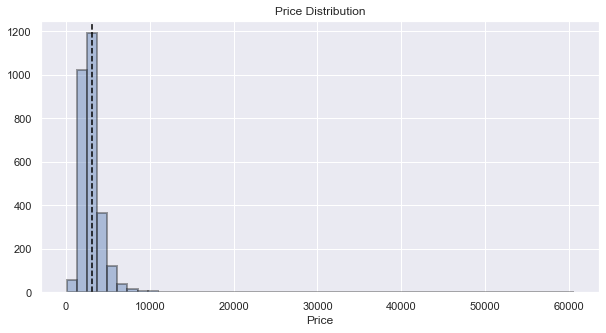

In [13]:
# plot price distributions
plt.subplots(figsize = (10,5))
g = sns.distplot(df1[df1['Price'].notnull()]['Price'], hist_kws=dict(edgecolor="k", linewidth=2), bins = 50, kde = False)
plt.axvline(x = df1[df1['Price'].notnull()]['Price'].mean(), color = 'black', linestyle = 'dashed')
g.set_title('Price Distribution')
plt.show()

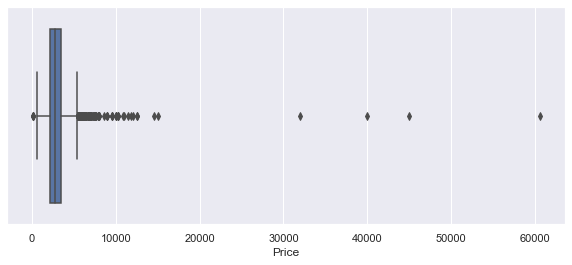

In [14]:
# boxplot of price
plt.subplots(figsize=(10,4))
sns.boxplot(df1['Price'])

The plot above shows a skewed distribution. This shows that there are a number of postings that are above \$10000. Were going to explore these outliers and see if they represent our data well. First we need to find which postings are outliers. We will use the formula below. We will consider outliers those postings that have a Z-score of less than -3 or greater than 3.

<img src = "Outlierimg.png"/>

In [15]:
# z scores for outlier detection
# remove outliers above 3
z = np.abs(stats.zscore(df1['Price'], nan_policy = 'omit'))

In [16]:
# the post where price is an outlier, not representative of average housing pricing
df1[(z > 3)]

<ipython-input-16-f007b71c1e1d>:2: RuntimeWarning: invalid value encountered in greater
  df1[(z > 3)]


,Title,Price,Bedrooms,Bathrooms,Square_feet,Dog,Cat,Parking,Smoking,Time_posted,Longitude,Latitude,Area
136,$11999 / 3br - 1750ft2 - Two-story luxury pent...,11999.0,3.0,2.5,1750.0,Yes,Yes,NaN,smoking ok,2020-03-02 17:39:00,-122.410011,37.803833,sfc
320,$9500 / 2br - 1456ft2 - Furnished Four Seasons...,9500.0,2.0,2.5,1456.0,No,No,no parking,no smoking,2020-02-14 15:51:00,-122.404938,37.786445,sfc
330,$14600 / 2br - 2230ft2 - Millennium Tower Stun...,14600.0,2.0,3.0,2230.0,No,No,NaN,smoking ok,2020-02-18 15:41:00,-122.389200,37.786400,sfc
331,$11500 / 2br - 1953ft2 - Furnished Millennium ...,11500.0,2.0,2.0,1953.0,No,No,NaN,smoking ok,2020-02-24 14:54:00,-122.389200,37.786400,sfc
527,$9500 / 3br - 3250ft2 - Beautiful 3bed/3.5bath...,9500.0,3.0,3.5,3250.0,No,No,NaN,no smoking,2020-03-02 16:16:00,-122.208871,37.425537,pen
673,$9500 / 3br - Russian Hill | 2123 Hyde Street ...,9500.0,3.0,3.0,NaN,Yes,Yes,NaN,no smoking,2020-03-02 16:40:00,-122.419276,37.800342,sfc
824,$45000 / 4br - 4700ft2 - Potrero Hill 5-Level ...,45000.0,4.0,5.0,4700.0,Yes,Yes,NaN,smoking ok,2020-03-02 16:20:00,-122.397100,37.762100,sfc
835,$10000 / 5br - 4500ft2 - Fabulous and Grand Pi...,10000.0,5.0,0.0,4500.0,Yes,Yes,NaN,smoking ok,2020-03-02 16:20:00,-122.214589,37.818266,eby
847,$12500 / 3br - 3999ft2 - Pacific Heights Victo...,12500.0,3.0,3.0,3999.0,Yes,Yes,NaN,smoking ok,2020-03-02 16:19:00,-122.438660,37.787714,sfc
1335,$60578 / 3br - 1498ft2 - Modern Living Hillsda...,60578.0,3.0,2.0,1498.0,Yes,Yes,NaN,no smoking,2020-03-02 15:27:00,-122.299800,37.539500,pen


In [17]:
# our dataframe removing outliers
df1 = df1[(z < 3)]

<ipython-input-17-718d445ecf20>:2: RuntimeWarning: invalid value encountered in less
  df1 = df1[(z < 3)]


In [18]:
# prices under 200 are unbelievable prices and might be mistakes
df1[df1['Price'] < 200]

,Title,Price,Bedrooms,Bathrooms,Square_feet,Dog,Cat,Parking,Smoking,Time_posted,Longitude,Latitude,Area
1441,$88 / 1br - FURNISHED ONE BEDROOM APARTMENT IN...,88.0,1.0,1.0,NaN,No,Yes,NaN,no smoking,2020-02-16 00:12:00,-122.212400,38.098500,eby
1442,$68 FURNISHED STUDIO APARTMENT INCLUDE ALL UTI...,68.0,NaN,NaN,NaN,No,Yes,NaN,smoking ok,2020-02-03 18:28:00,-122.212400,38.098500,eby
1444,$75 / 1br - FURNISHED STUDIO APARTMENT INCLUDE...,75.0,1.0,1.0,NaN,No,Yes,NaN,no smoking,2020-02-18 12:24:00,-122.212400,38.098500,eby
1766,$105 / 2br - 2BR Apartment at the Golden Gate ...,105.0,2.0,1.0,NaN,No,No,NaN,smoking ok,2020-03-02 14:36:00,-122.453442,37.769215,sfc


As we can also see here with prices lower than 200 we can see that once the price is lower than this the postings stop making sense.

In [19]:
# removing outliers with low prices
rm_indx = df1[(df1['Price'] < 200)].index
df1.drop(rm_indx, inplace = True)

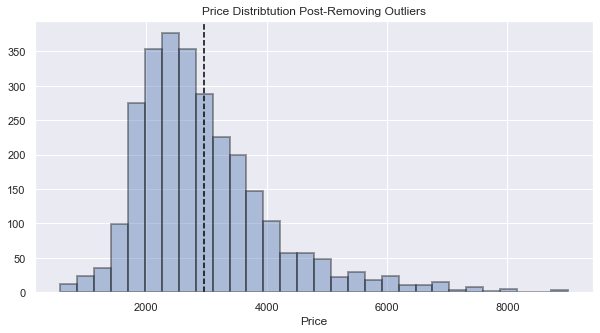

In [20]:
# plot new distributions with price outliers removed
plt.subplots(figsize = (10,5))
g = sns.distplot(df1[df1['Price'].notnull()]['Price'], hist_kws=dict(edgecolor="k", linewidth=2), bins = 30, kde = False)
plt.axvline(x = df1[df1['Price'].notnull()]['Price'].mean(), color = 'black', linestyle = 'dashed')
g.set_title('Price Distribtution Post-Removing Outliers')
plt.show()

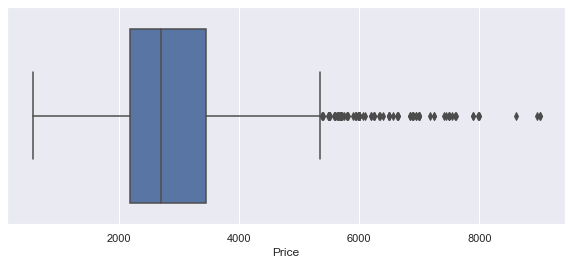

In [21]:
# boxplot of price post removing outliers
plt.subplots(figsize=(10,4))
sns.boxplot(df1['Price'])

This looks better than the super skewed distribution we had before. 

### Location of Postings

In [22]:
# Which areas
print(df1['Area'].unique())

['pen' 'eby' 'sby' 'sfc' 'nby' 'scz']


In this dataset we have 6 different areas which are the Pensinsula, East Bay, South Bay, San Francisco City, North Bay, and Santa Cruz.

Text(0.5, 1.0, 'Number of Postings in Dataset by Area')

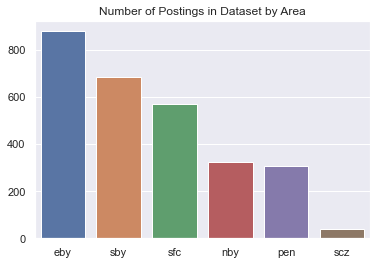

In [23]:
# Number of postings in our areas
num_Area_post = df1['Area'].value_counts()
sns.barplot(num_Area_post.index, num_Area_post.values)
plt.title('Number of Postings in Dataset by Area')

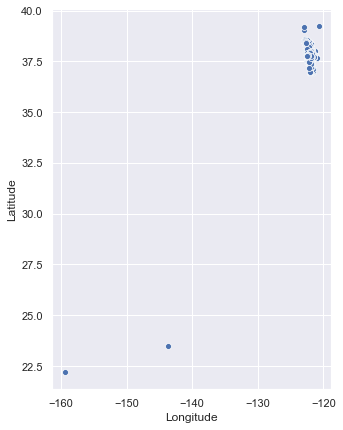

In [24]:
# quick scatterplot of latitude and longitude
plt.subplots(figsize=(5,7))
sns.scatterplot(x = 'Longitude', y = 'Latitude', data=df1)

There are two instances postings that have corrdinates far from the other coordinates. We need to look at these to see if they are an error or if their truly from some other location.

In [25]:
# postings with different coordinates
# one is from kauai and the other is from pittsburg
df1[df1['Latitude'] < 35.0]['Title']

349     $3600 / 5br - 2820ft2 - House for rent (pittsb...
1401    $5500 / 5br - 5000ft2 - Kauai Country Estate (...
Name: Title, dtype: object

In [26]:
# postings with high latitudes then average
df1[df1['Latitude'] > 39.0]['Title']

1404    $1180 / 1br - Lakeport Studio Apartment (lake ...
2417    $2500 / 5br - 3200ft2 - 5+ bed 3 bath house fo...
2593       $2750 / 4br - 3000ft2 - Home for Lease (Alta) 
Name: Title, dtype: object

In [27]:
# drop columns
df1 = df1.drop(df1[(df1['Latitude'] < 35.0) | (df1['Latitude'] > 39.0)]['Title'].index)

In [28]:
# reset index
df1 = df1.reset_index(drop=True)

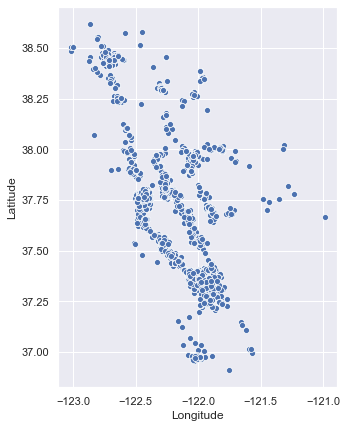

In [29]:
# scatterplot of latitude and longitude post removing bad coordinates
plt.subplots(figsize=(5,7))
sns.scatterplot(x = 'Longitude', y = 'Latitude', data=df1)

#### Nicer Map of Location with Basemap

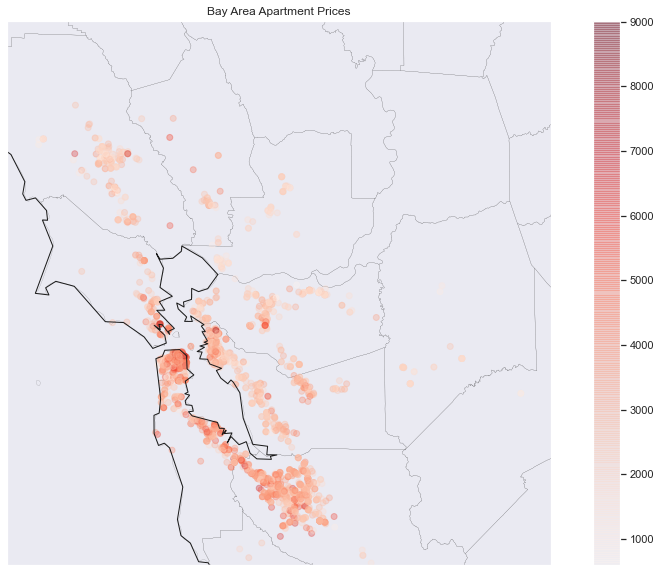

In [30]:
from mpl_toolkits.basemap import Basemap

###############################################
#https://zapcircle.net/geomapping-with-python/#
###############################################

#initiate the figure with it's size
fig = plt.figure(figsize = (15, 10))

#initialize the basemap
m = Basemap(projection = 'lcc',
            resolution='i',
            lon_1 = -123.5,
            lon_2 = -120.5,
            lat_0 = 38.0,
            lon_0 = -122,
            width=200000,
            height=200000)

m.drawcounties()
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# plot points
m.scatter(df1['Longitude'].values,
          df1['Latitude'].values,
          latlon = True,
          c = df1['Price'].tolist(),
          cmap = 'Reds',
          alpha = 0.3)

plt.colorbar()
plt.title('Bay Area Apartment Prices')
plt.show()

From this map we can alreaady tell which areas are more expensive. It seems that sfc, pensinsula, and San Jose seem to have higher prices.

#### Density Map with Folium

In [31]:
###########################################################
#https://alcidanalytics.com/p/geographic-heatmap-in-python#
###########################################################

import folium
from folium.plugins import HeatMap

fig = plt.figure(figsize = (8, 8))

# copy of dataset
df_heatmap = df1.copy()

# drop na rows for longitude and latitude
df_heatmap = df_heatmap.dropna(subset=['Longitude', 'Latitude'])

max_amount = float(df_heatmap['Price'].max())

#initialize the Basemap
hmap = folium.Map(location=[38, -122], zoom_start=8, )
HeatMap(list(zip(df_heatmap['Latitude'].values, df_heatmap['Longitude'].values, df_heatmap['Price'].values)),
                min_opacity=0.25,
                radius=22, 
                max_zoom=1,
                blur = 18
                 ).add_to(hmap)
hmap

<Figure size 576x576 with 0 Axes>

From the maps above we can already see which areas in our dataset have higher apartment prices. San Francisco followed by San Jose seem to be the most expensive areas. 

### Relationship of Price with Independent Variables

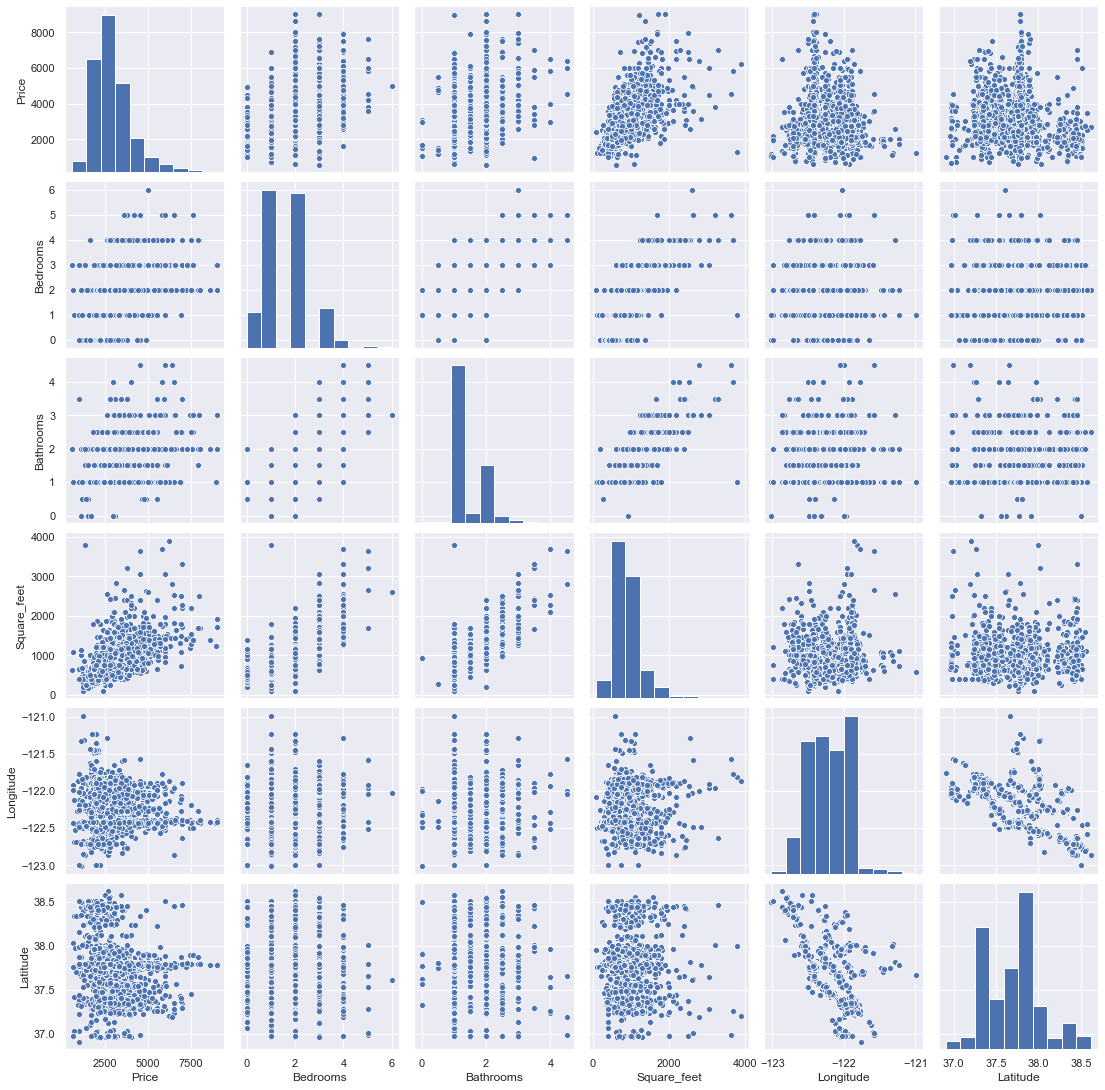

In [32]:
### pairplot
sns.pairplot(df1)

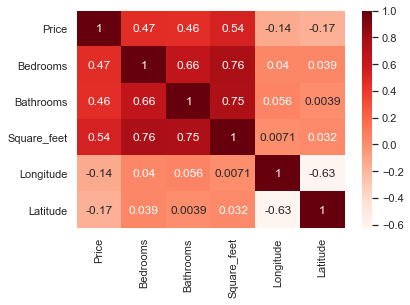

In [33]:
# correlation
correlations = df1.corr()
sns.heatmap(correlations, annot = True, cmap = 'Reds')

We can see that there is some sort of relationship between price and Bathroom, Bedroom, and Square Feet. The correlations show that these three variables have a positive linear relationship, but low strength. We can also see that bathrooms & bedrooms have a high correlation with square footage, which is expected since as there are more number of bedrooms and bathrooms than square footage will increase.

Text(0.5, 1.0, 'Price Density by Area')

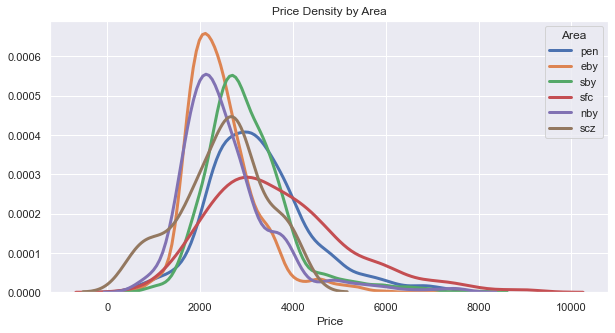

In [34]:
plt.subplots(figsize = (10,5))
Areas = df1['Area'].unique()

for area in Areas:
    subset = df1[df1['Area'] == area]
    
    sns.distplot(subset['Price'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = area)
plt.legend(title = 'Area')
plt.title('Price Density by Area')

Text(0.5, 1.0, 'Boxplot of Price by Area')

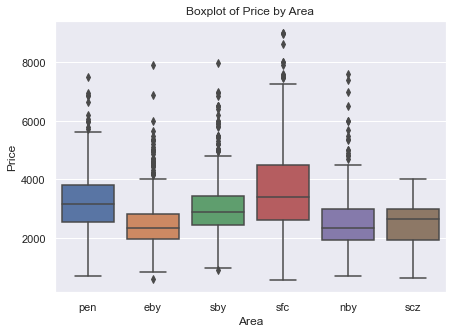

In [35]:
# boxplot for area prices
plt.subplots(figsize=(7,5))
sns.boxplot(x = 'Area', y = 'Price', data=df1)
plt.title('Boxplot of Price by Area')

San Francisco City and the Pensinsula seem to have the highest average apartment prices.

#### Square Footage

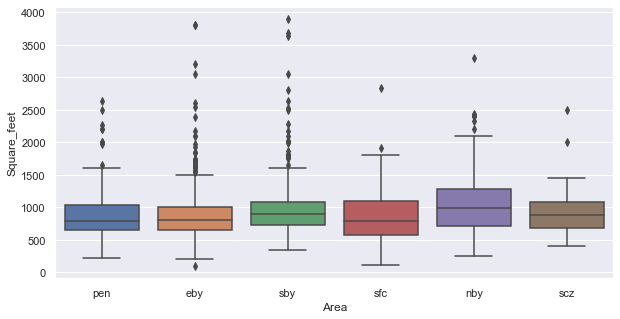

In [36]:
# boxplot of square footage by area
plt.figure(figsize=(10,5))
g = sns.boxplot(x = 'Area', y = 'Square_feet', data = df1)

I plotted square footage to see if some areas have bigger apartments, but places seem to be on average around the same size on average for all different areas.

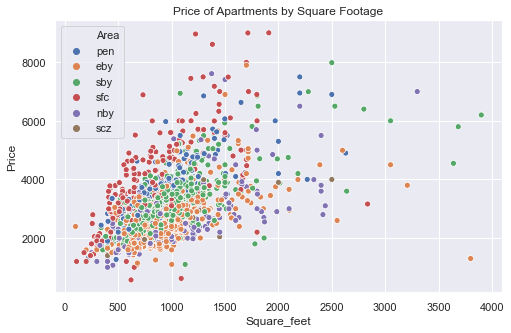

In [37]:
# square footage x price scatterplot
plt.subplots(figsize=(8,5))
g = sns.scatterplot(x = 'Square_feet', y = 'Price', hue = 'Area', data=df1)
g.set_title('Price of Apartments by Square Footage')
plt.show()

By plotting square footage with price for different areas on the same plotw e can already tell that sfc and pen have larger prices for same square footage than other areas.

In [38]:
# make mask to remove nan values
mask = ~np.isnan(df1['Square_feet']) & ~np.isnan(df1['Price'])
df_mask = df1[mask]

In [39]:
### Function to return values of linear regression for each area
def linRegLine(area):
    subset = df_mask[df_mask['Area'] == area] # subset by area
       
    # assign values to X, y   
    X, y = subset['Square_feet'].values.reshape(-1,1), subset['Price'].values.reshape(-1,1)
    r = stats.pearsonr(subset['Square_feet'], subset['Price'])
    
    # fit model regression line to X,y
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    return regr.coef_[0][0],regr.intercept_[0], r[0]

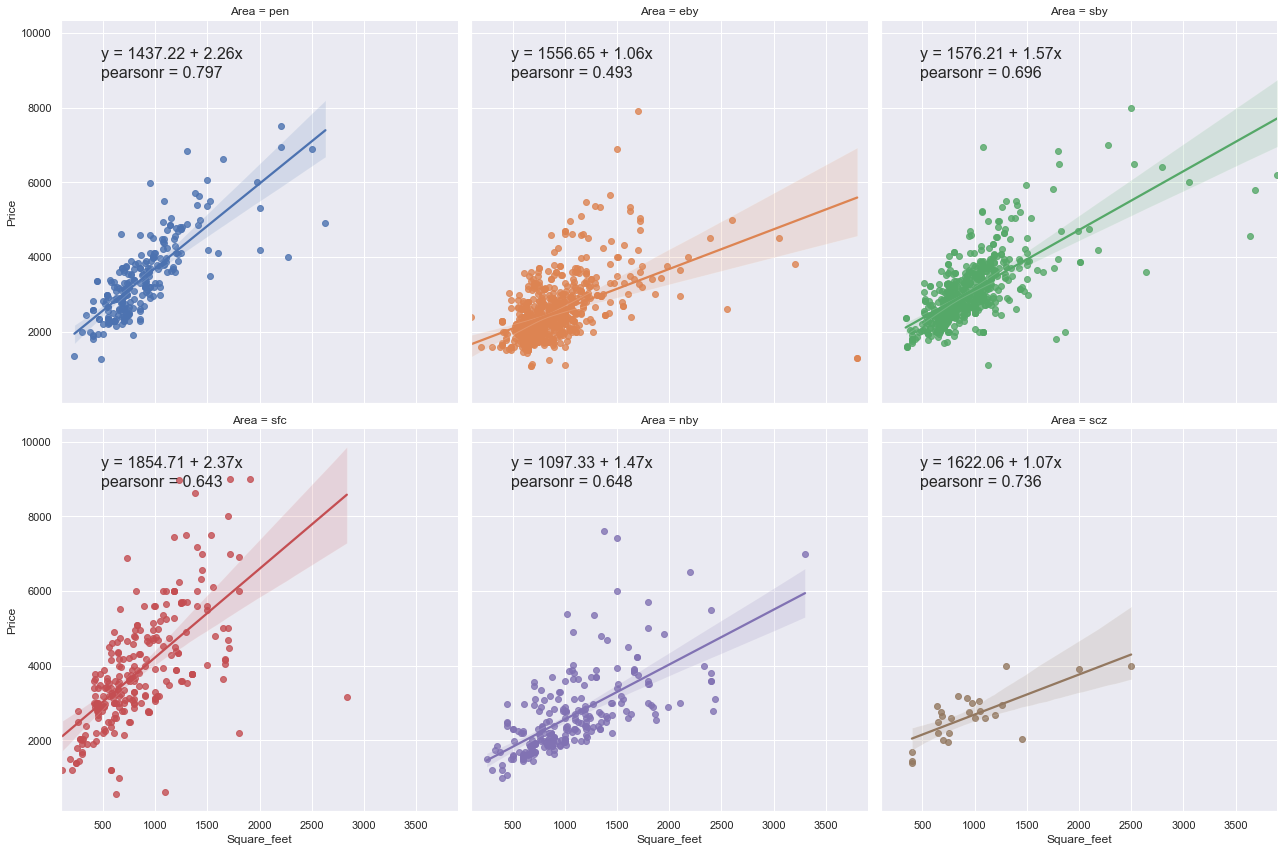

In [40]:
# linear scatterplots for each area
col_order = df_mask['Area'].unique().tolist() # list of column order

# graph the linear regression lines
g = sns.lmplot(x = 'Square_feet', y = 'Price', col = 'Area',
              data = df1, col_wrap = 3, height = 6,
              hue = 'Area', col_order = col_order)

# add regression line formula, and pearson r
for ax, area in zip(g.axes, col_order):
        coef, intercept, r = linRegLine(area) # call function to get coef & intercept for text
        textstr = 'y = {0} + {1}x'.format(round(intercept,2), round(coef,2))
        ax.text(0.1, 0.9, textstr, transform=ax.transAxes, fontsize=16) #add text
        ax.text(0.1, 0.85, 'pearsonr = {0}'.format(round(r,3)), transform=ax.transAxes, fontsize=16)

Plotting square footage against Price for each area we can and drawing a linear model line we can see the slopes of each. These slopes let us know that according the areas where square footage affects the price the most is sfc & pen. The price for each square feet in San Francisco City and the Peninsula is double the price of some of the cheaper areas like the East Bay and San Cruz.

In [41]:
df_mask = df_mask.assign(PricePerFoot = df_mask['Price'] / df_mask['Square_feet'])

In [42]:
df_mask

,Title,Price,Bedrooms,Bathrooms,Square_feet,Dog,Cat,Parking,Smoking,Time_posted,Longitude,Latitude,Area,PricePerFoot
0,$7500 / 4br - 2200ft2 - Prime Location Near Do...,7500.0,4.0,2.0,2200.0,No,No,NaN,no smoking,2020-03-02 18:03:00,-122.188886,37.451399,pen,3.409091
1,$2195 / 1br - 950ft2 - YOUR DREAM HOME IS ABOU...,2195.0,1.0,1.0,950.0,No,Yes,NaN,no smoking,2020-03-02 18:03:00,-122.139221,37.686232,eby,2.310526
2,$5375 / 3br - 1286ft2 - Stunning Views of the ...,5375.0,3.0,2.0,1286.0,Yes,Yes,NaN,smoking ok,2020-02-20 18:13:00,-122.274055,37.795558,eby,4.179627
3,$3864 / 2br - 1149ft2 - Enjoy 2 Weeks FREE- Le...,3864.0,2.0,2.0,1149.0,Yes,Yes,NaN,no smoking,2020-03-02 17:27:00,-121.984400,37.348300,sby,3.362924
4,$2400 / 1br - 550ft2 - Cozy 1 bed/1 bath in Co...,2400.0,1.0,1.0,550.0,No,No,NaN,no smoking,2020-03-02 18:02:00,-122.152399,37.460140,pen,4.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,$2200 / 500ft2 - AVAILABLE NOW!! Large West El...,2200.0,0.0,1.0,500.0,No,No,street parking,no smoking,2020-02-24 19:23:00,-122.235281,37.479635,pen,4.400000
2792,$2300 / 1br - 600ft2 - AVAILABLE NOW!! Remodel...,2300.0,1.0,1.0,600.0,No,No,NaN,no smoking,2020-02-24 19:47:00,-122.213277,37.473138,pen,3.833333
2793,$3085 / 2br - 1069ft2 - Top Floor! Washer/Drye...,3085.0,2.0,2.0,1069.0,Yes,Yes,NaN,no smoking,2020-03-02 12:18:00,-121.855438,37.668902,eby,2.885875
2795,$2441 / 2br - 750ft2 - Best Prices Of The Seas...,2441.0,2.0,1.0,750.0,No,No,NaN,smoking ok,2020-03-02 12:18:00,-121.952200,37.756200,eby,3.254667


Text(0.5, 1.0, 'Median Price per Square foot by Area')

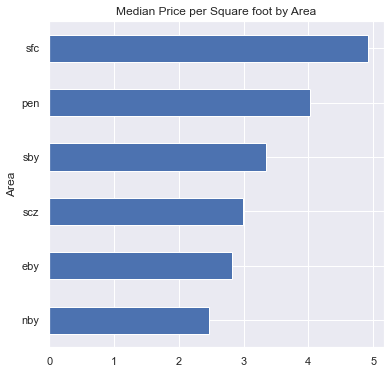

In [43]:
# median price per square foot by area
g = df_mask.groupby('Area')['PricePerFoot'].median().sort_values(ascending = True).plot(kind = 'barh', figsize = (6,6))
g.set_title('Median Price per Square foot by Area')

#### Number of Bedrooms in Areas

Text(0.5, 1.0, 'Stacked Plot of Number of Rooms by Area')

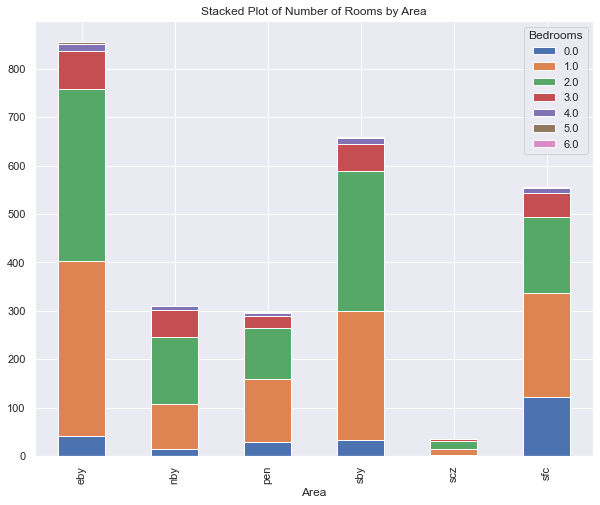

In [44]:
### Number of rooms in each area.? More suitable for families?
area_bedrooms = df1.groupby(['Area','Bedrooms']).size().reset_index().pivot(columns = 'Bedrooms', index = 'Area', values = 0)
g = area_bedrooms.plot(kind='bar', stacked=True, figsize=(10,8))
g.set_title('Stacked Plot of Number of Rooms by Area')

This graph looks like our countplot that counted the number of postings for each area, but shows the number of postings for each area. While this is ok we can see these number proportional to see if it shows us more.

In [45]:
# group area and bedrooms to count and be able to use proportions
area_bedrooms = df1.groupby(['Area','Bedrooms']).size().reset_index().pivot(columns = 'Bedrooms', index = 'Area', values = 0)

In [46]:
# sum of the rooms by index 
sum_rooms = area_bedrooms.sum(axis=1)

# use same index to divide area total rooms to get proportions
for area in area_bedrooms.index:
    area_bedrooms.loc[area] = round(area_bedrooms.loc[area] / sum_rooms.loc[area] * 100, 2)

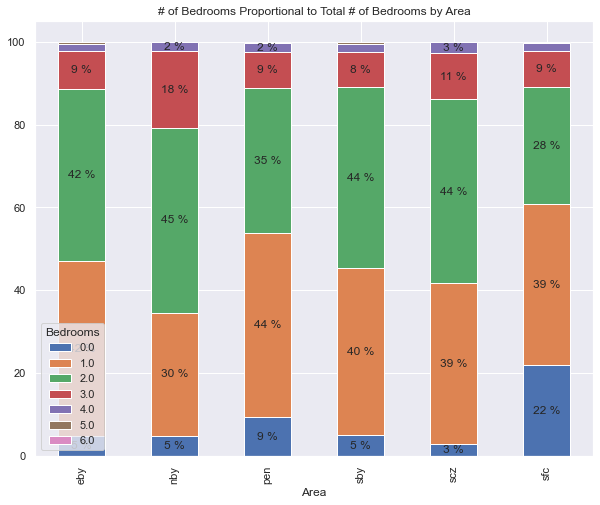

In [47]:
# stacked plot by proportions
ax = area_bedrooms.plot(kind='bar', stacked=True, figsize=(10,8))
ax.set_title('# of Bedrooms Proportional to Total # of Bedrooms by Area')

# annotate graph skipping less than 2%
### https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if (height < 2):
        continue
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

Made two plots to show number of bedrooms one is proportional to the area the other is a stacked plot. All areas have proportionally higher number of 1 & 2 bedrooms housing. This is most likely to accomadate families. But we can see that SFC contains a higher proportion of no bedroom housing than any other area, it contains 61% of housing with 1 or less rooms. This means that alot of studio apartments are available in this area. The best area for families is the northbay which contains 65% of housing with 2 or more rooms.

### Misc

- How does pet policy affect price?
- How does it affect price in different areas?
- How does smoking policy affect price?
- How does parking affect price?

In [48]:
# initialize list
pets_allowed = []

for i in range(len(df1)):
    if (df1['Dog'][i] == 'Yes') & (df1['Cat'][i] == 'Yes'):
        pets_allowed.append('Both')
    elif (df1['Dog'][i] == 'No') & (df1['Cat'][i] == 'No'):
        pets_allowed.append('No Pets')
    elif (df1['Dog'][i] == 'Yes') & (df1['Cat'][i] == 'No'):
        pets_allowed.append('Dogs Allowed')
    elif (df1['Dog'][i] == 'No') & (df1['Cat'][i] == 'Yes'):
        pets_allowed.append('Cats Allowed')
    else:
        break

In [49]:
# insert new column
df1['Pet_policy'] = pets_allowed

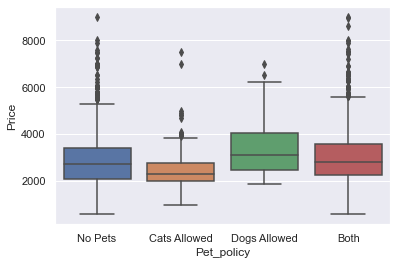

In [50]:
# box of pet policy overall
sns.boxplot(x= 'Pet_policy', y = 'Price', data = df1, order = ['No Pets', 'Cats Allowed', 'Dogs Allowed', 'Both'])

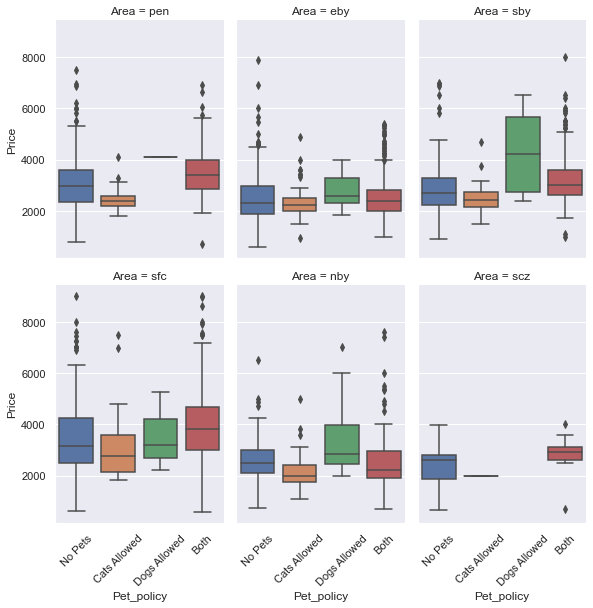

In [51]:
# Price comparing pet_policy
g = sns.catplot(x = 'Pet_policy', y = 'Price',
            kind = 'box',
            data = df1,
            col = 'Area',
            col_wrap = 3,
            aspect = .7,
            height = 4, 
            order = ['No Pets', 'Cats Allowed', 'Dogs Allowed', 'Both'])
g.set_xticklabels(rotation = 45)

There really doesn't seem to be a big trend going on with pet policy besides that places that allow dogs are pricier than those who only allow cats. And No Pets seems to be a higher priced than alot of the other categories, but that may be the way this data was collected. I assumed that if they didn't put a pet policy on the post than assumed no pets were allowed. 

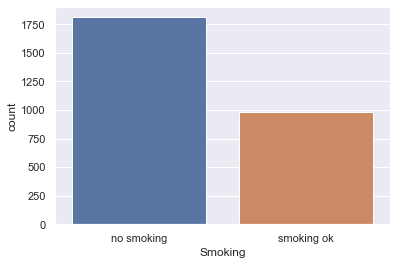

In [52]:
# countplot smoking
sns.countplot(x='Smoking', data =df1)

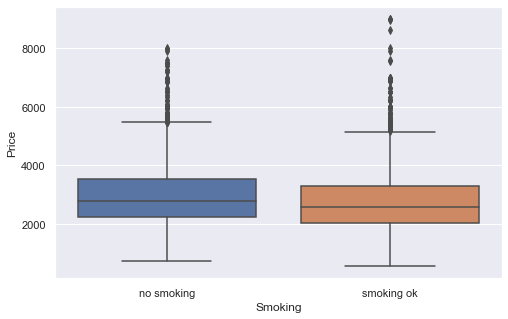

In [53]:
# boxplot smoking policy
plt.subplots(figsize = (8,5))
sns.boxplot(x = 'Smoking', y = 'Price', data = df1)

Smoking policy seems to significantly affect housing prices. This is again a variable where I assumed if there was no policy on the post I assumed 'no smoking'. So prices for either are similar.

### Conclusion

Through our EDA we found that square footage and location is the most important factors for determing price of apartments in our datasets. We were able to find the median square footage to show that San Francisco City and Pensinsula were the the most expensive areas to live in. San Francisco city also had smaller number of apartments avaialable that had more than 1 bedrooms. with price being so high in this area we and smaller apartments it's mostly not beneficial to live in this area. The place we do recommend is the North Bay that had the lowest median price per square foot and a high percentage of rooms greater than 2.

The other variables were not so telling about what price would be. This may be due to how we collected the data where we had to assume some of the information for example the pet policy and smoking policy. We will try to see if we can build a model to see if we can predict price and see if we can see how important each variable was.